## Visuals

Notebook that contains the code to generate the figures for the technical report.

In [1]:
import pandas as pd
from utils import *
import os

In [2]:
if not os.path.exists('../figures'):
    os.makedirs('../figures')

In [3]:
df = pd.read_csv(f"../data/dataset.csv")
df.head()

,timestamp,id,bikes_available,lat,lon,hour,temperature_celsius,precipitation_mm,humidity_percent,wind_speed_kmh,...,is_weekend,month_sin,month_cos,lag_1,lag_4,lag_8,lag_12,lag_24,roll_mean_4,roll_mean_8
0,2024-12-01 06:15:00,1,1,39.480042,-0.382929,6,11.575,0.0,83.00,5.3,...,1,-2.449294e-16,1.0,1.0,1.0,0.0,2.0,1.0,1.0,0.750
1,2024-12-01 06:30:00,1,1,39.480042,-0.382929,6,11.550,0.0,83.00,5.2,...,1,-2.449294e-16,1.0,1.0,1.0,0.0,2.0,3.0,1.0,0.875
2,2024-12-01 06:45:00,1,1,39.480042,-0.382929,6,11.525,0.0,83.00,5.1,...,1,-2.449294e-16,1.0,1.0,1.0,1.0,0.0,3.0,1.0,1.000
3,2024-12-01 07:00:00,1,1,39.480042,-0.382929,7,11.500,0.0,83.00,5.0,...,1,-2.449294e-16,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.000
4,2024-12-01 07:15:00,1,0,39.480042,-0.382929,7,11.475,0.0,83.25,5.0,...,1,-2.449294e-16,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.000


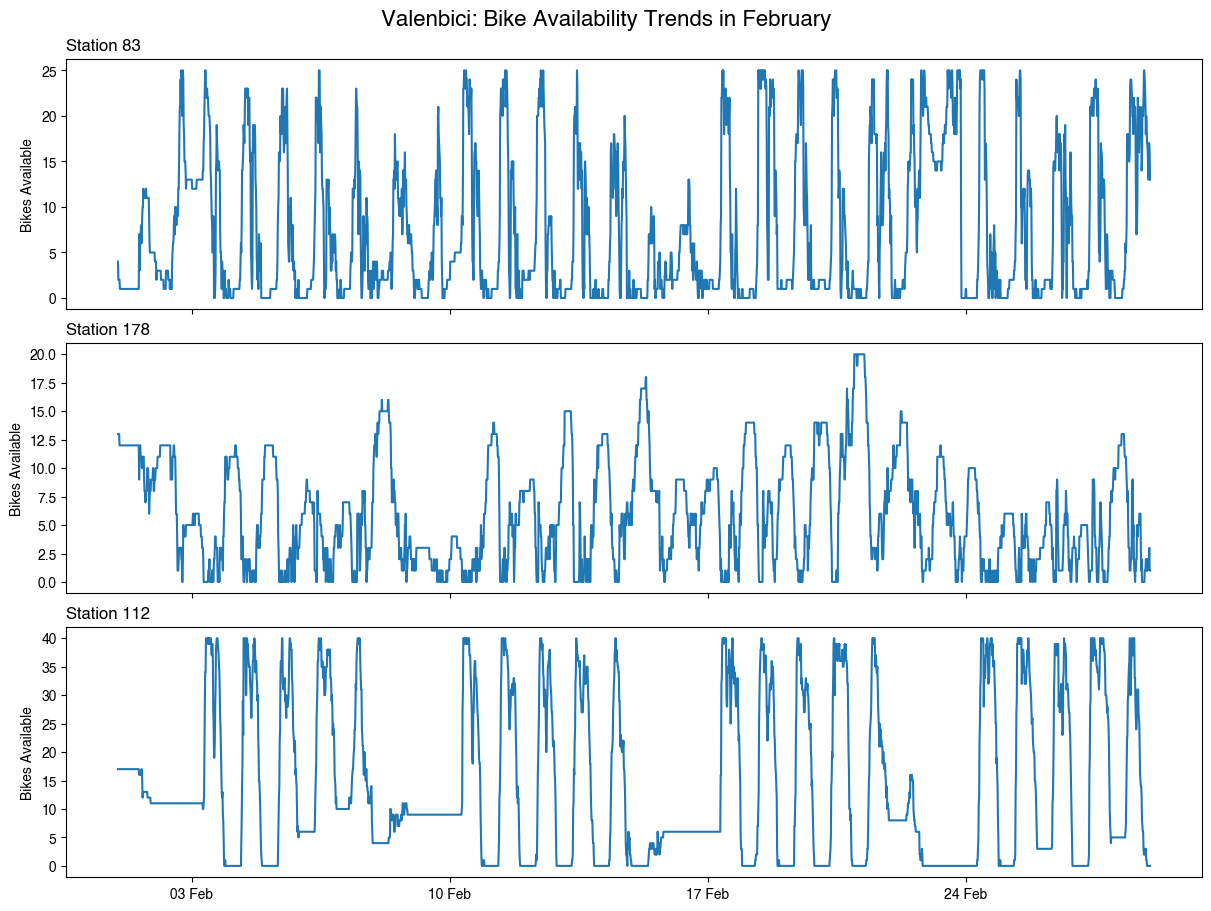

In [4]:
plot_target_time_series(
    df,
    month = 2,
    station_ids = [83, 178, 112]
)

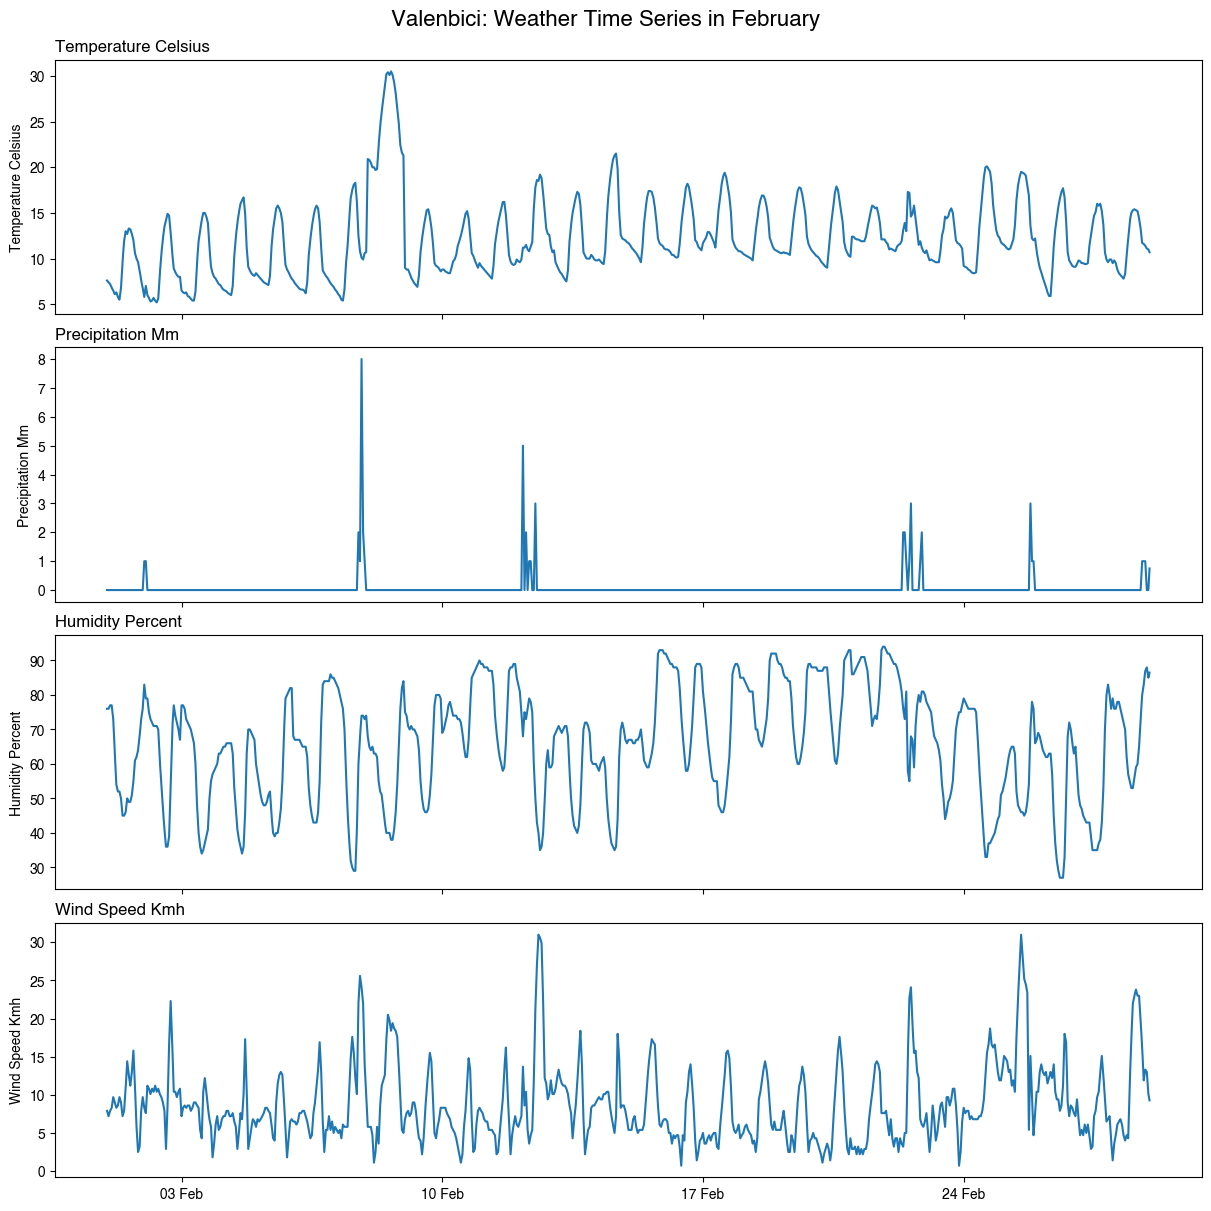

In [5]:
plot_wheather_time_series(
    df,
    month = 2
)

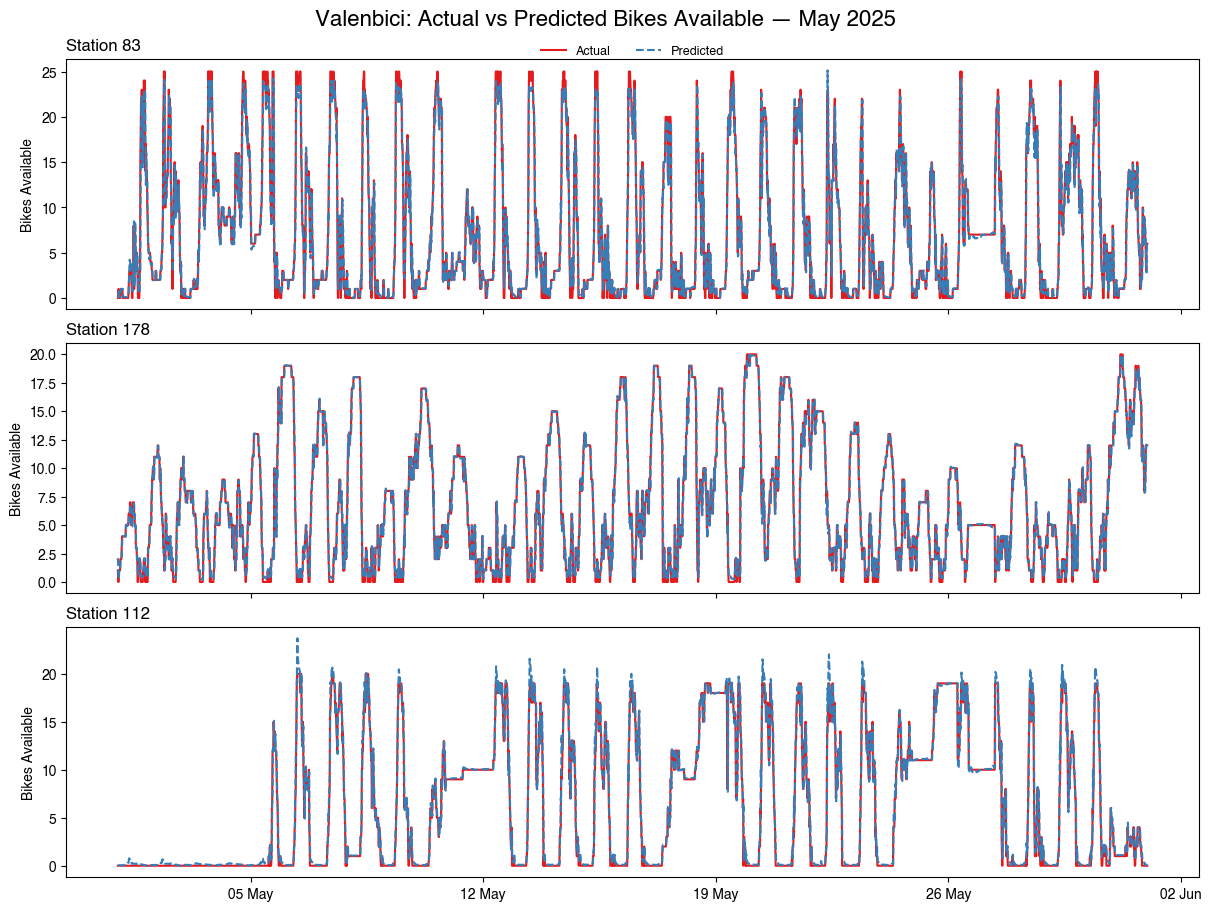

In [6]:
plot_test_time_series(
    df,
    station_ids = [83, 178, 112]
)

100%|██████████| 812448/812448 [00:04<00:00, 168661.50it/s]


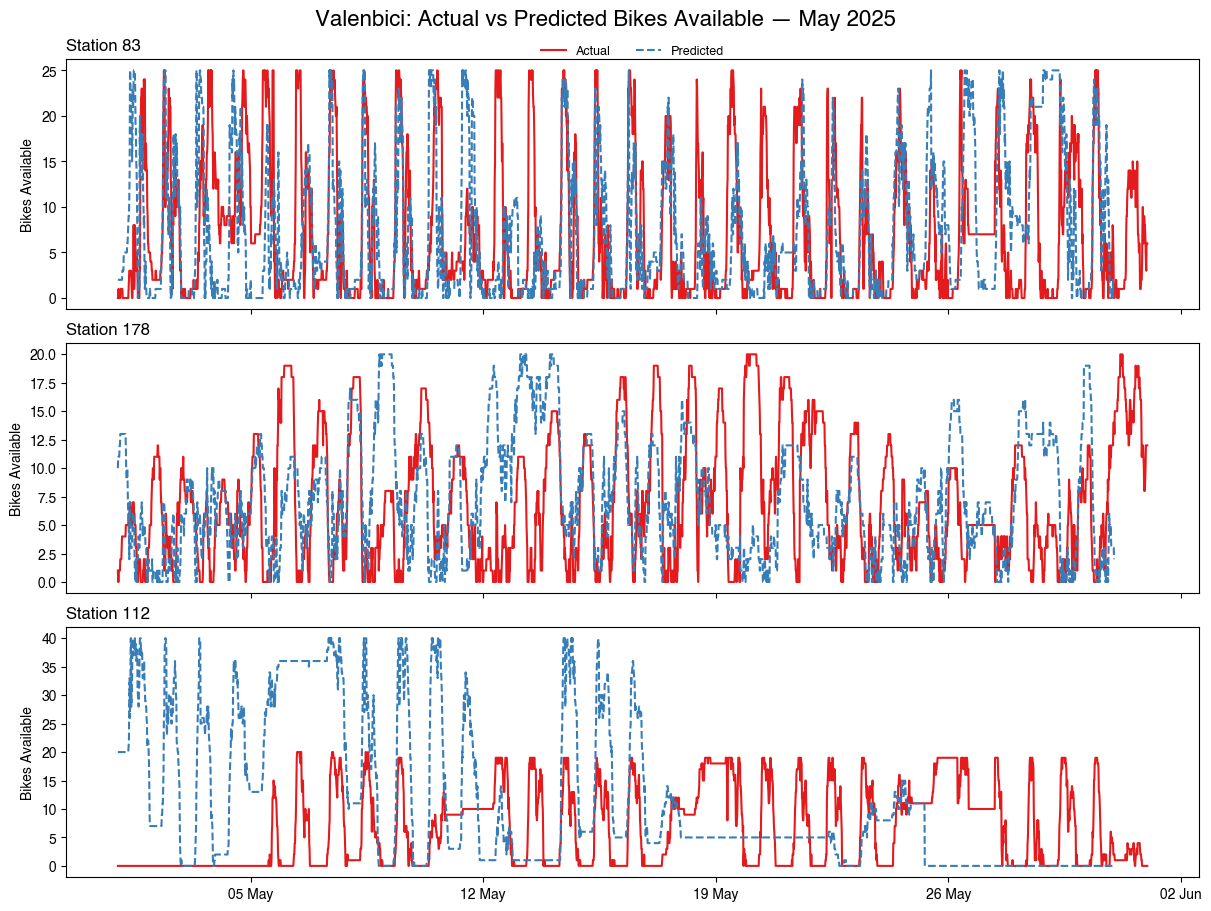

In [7]:
plot_naive_forecast(
    df,
    station_ids = [83, 178, 112]
)

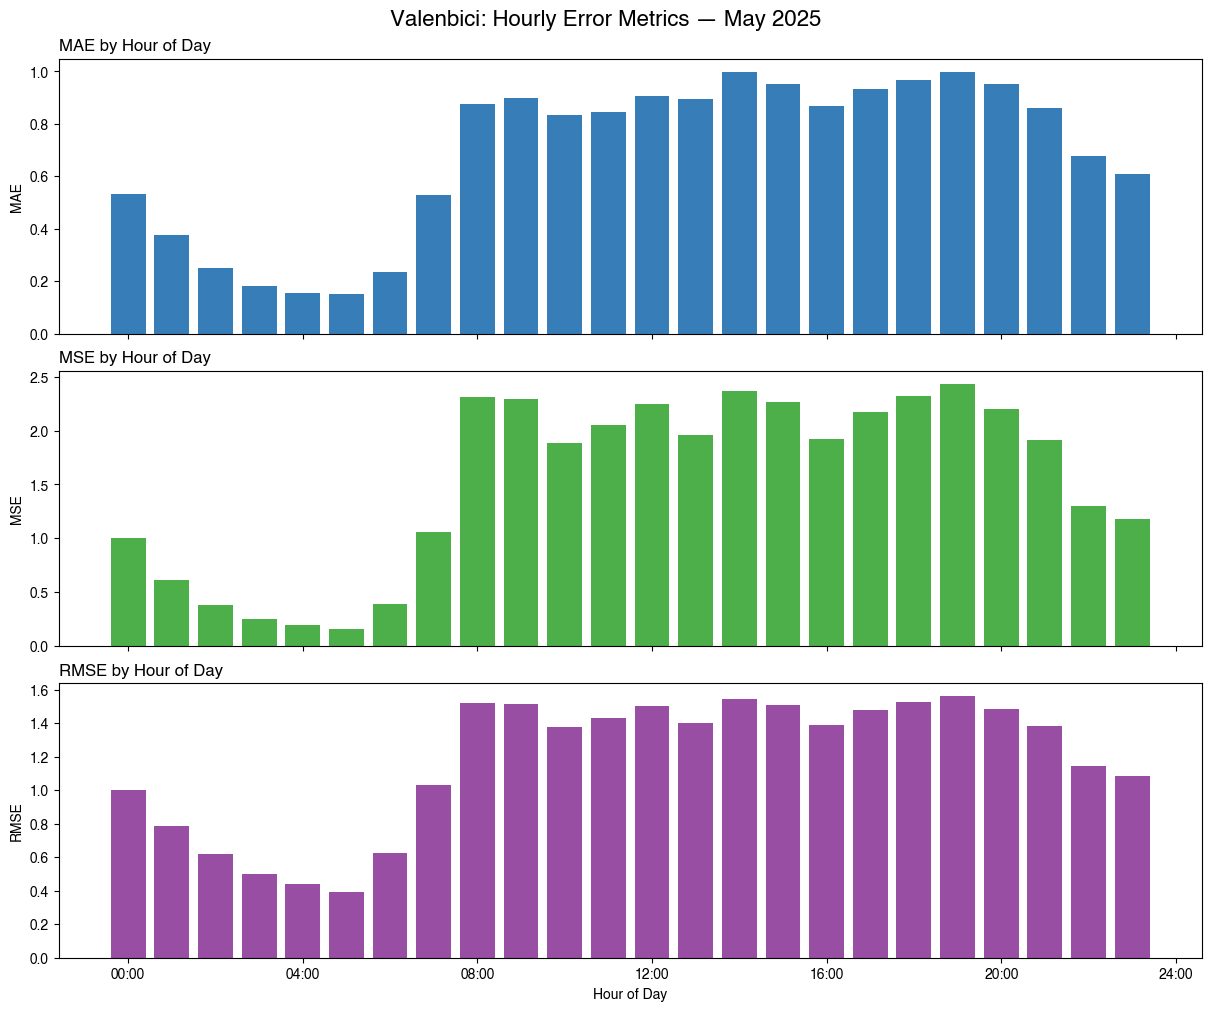

In [8]:
plot_metrics_by_hour(df)

100%|██████████| 812448/812448 [00:04<00:00, 166090.78it/s]


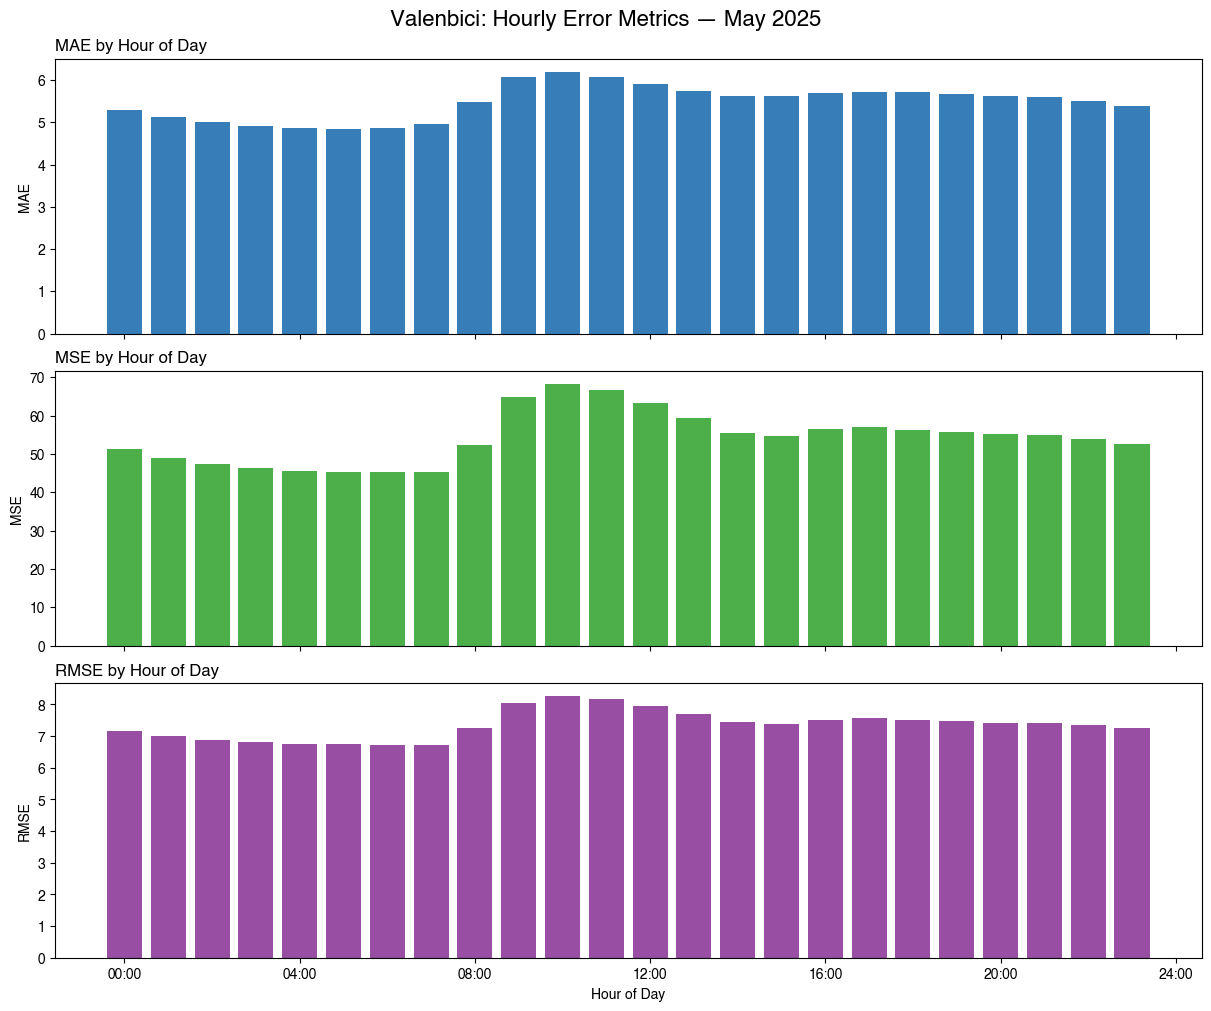

In [9]:
plot_metrics_by_hour_naive_forecast(df)

'Note that it is important to check that the model is accurate enough on a test set before plotting the partial dependence since there would be little use in explaining the impact of a given feature on the prediction function of a model with poor predictive performance. In this regard, our MLP model works reasonably well.' *ref*

In [5]:
df.columns

Index(['timestamp', 'id', 'bikes_available', 'lat', 'lon', 'hour',
       'temperature_celsius', 'precipitation_mm', 'humidity_percent',
       'wind_speed_kmh', 'weekday', 'is_weekend', 'month_sin', 'month_cos',
       'lag_1', 'lag_4', 'lag_8', 'lag_12', 'lag_24', 'roll_mean_4',
       'roll_mean_8'],
      dtype='object')

/Users/annagilmoliner/CD_2024_2025/EDM/smart-city/.venv/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 3 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


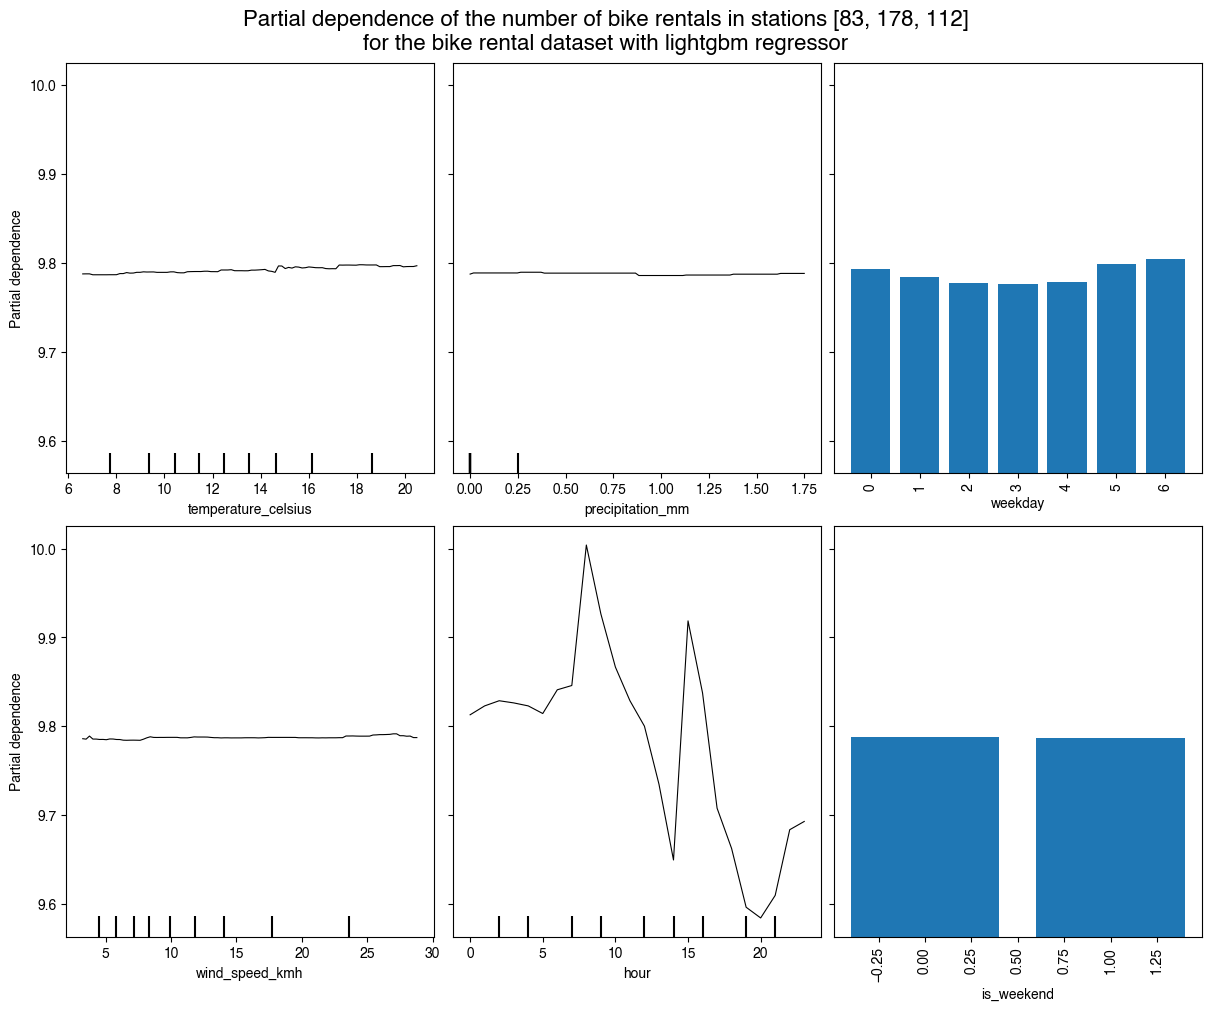

In [4]:
#partial dependece plot sin centrar
plot_pdp_or_ice(
    df, 
    station_ids=[83, 178, 112],#no se recomienda poner demasiadas estaciones puesto que el coste temporal es alto 
    choice = "pdp") 

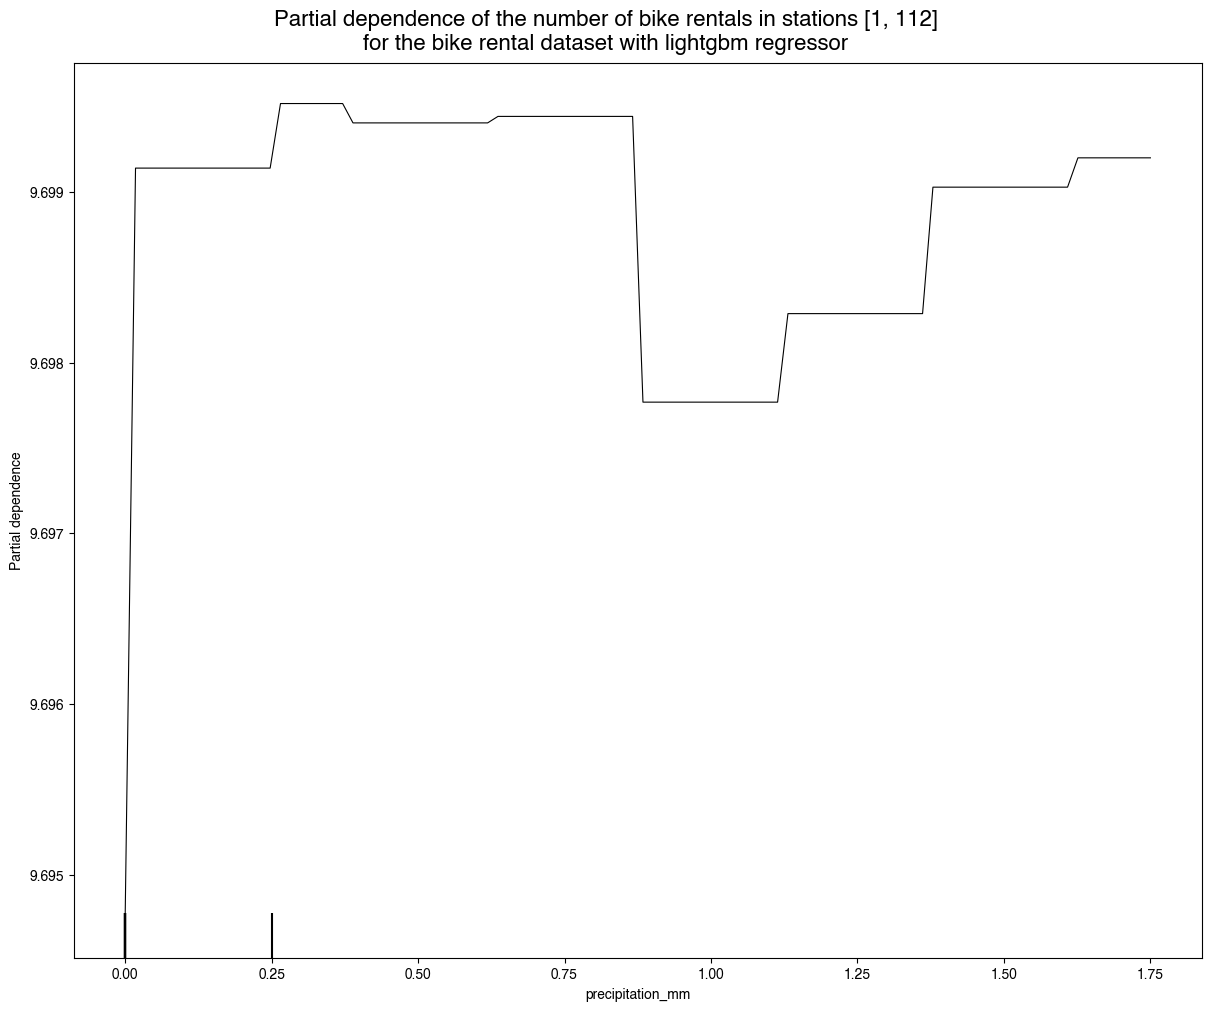

In [15]:
# ice centrado
plot_pdp_or_ice(
    df, 
    station_ids=[1,112],
    choice = "pdp", 
    ft = ["precipitation_mm"])  #permite especificar una feature 

/Users/annagilmoliner/CD_2024_2025/EDM/smart-city/.venv/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 3 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Users/annagilmoliner/CD_2024_2025/EDM/smart-city/.venv/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 9 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Users/a

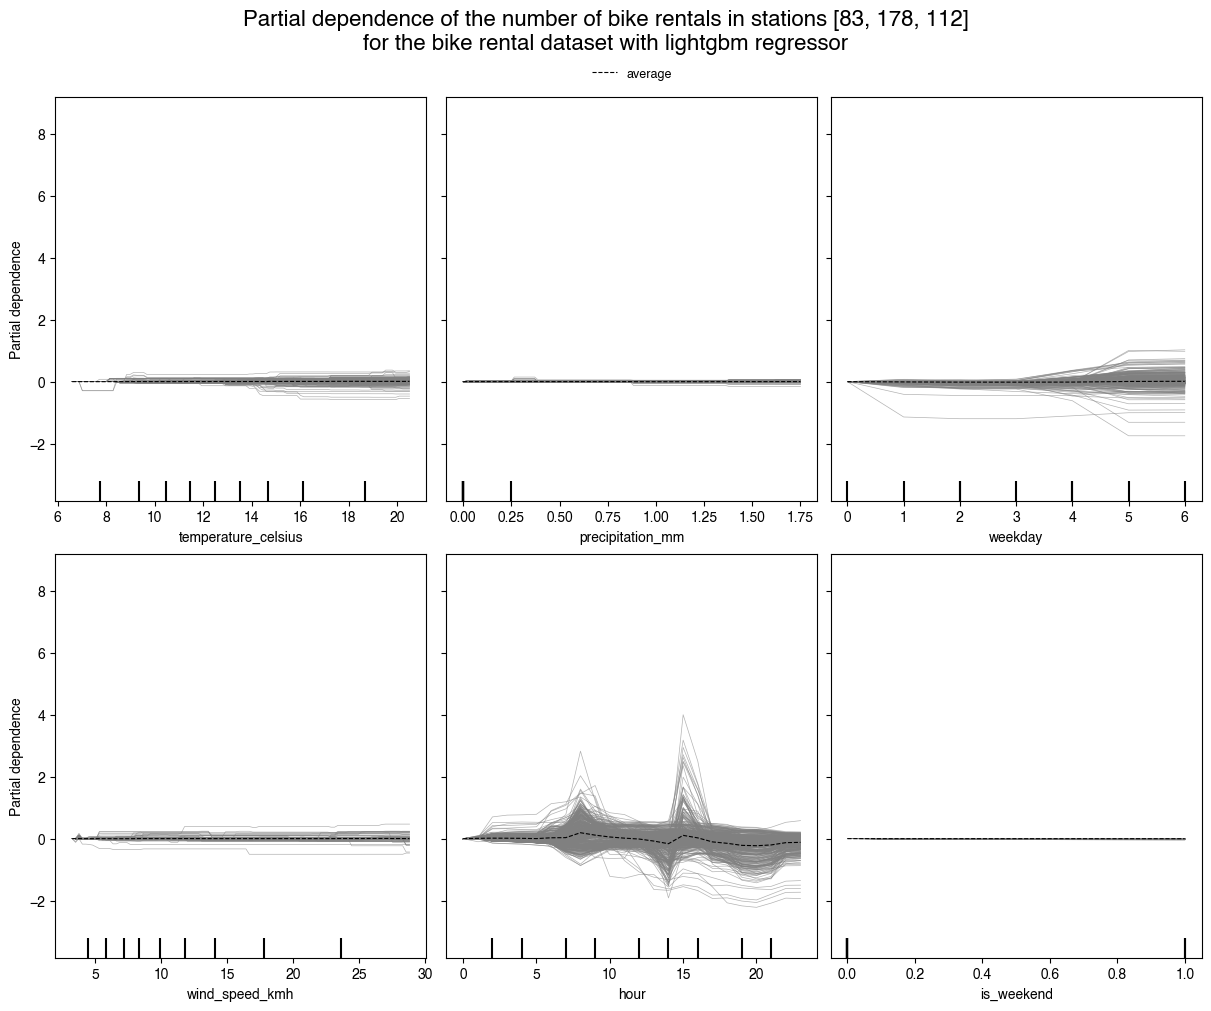

In [7]:
# ice con pdp centrado
plot_pdp_or_ice(
    df, 
    station_ids=[83, 178, 112],
    choice = "both")  #ice centrado

/Users/annagilmoliner/CD_2024_2025/EDM/smart-city/.venv/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 3 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Users/annagilmoliner/CD_2024_2025/EDM/smart-city/.venv/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 3 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


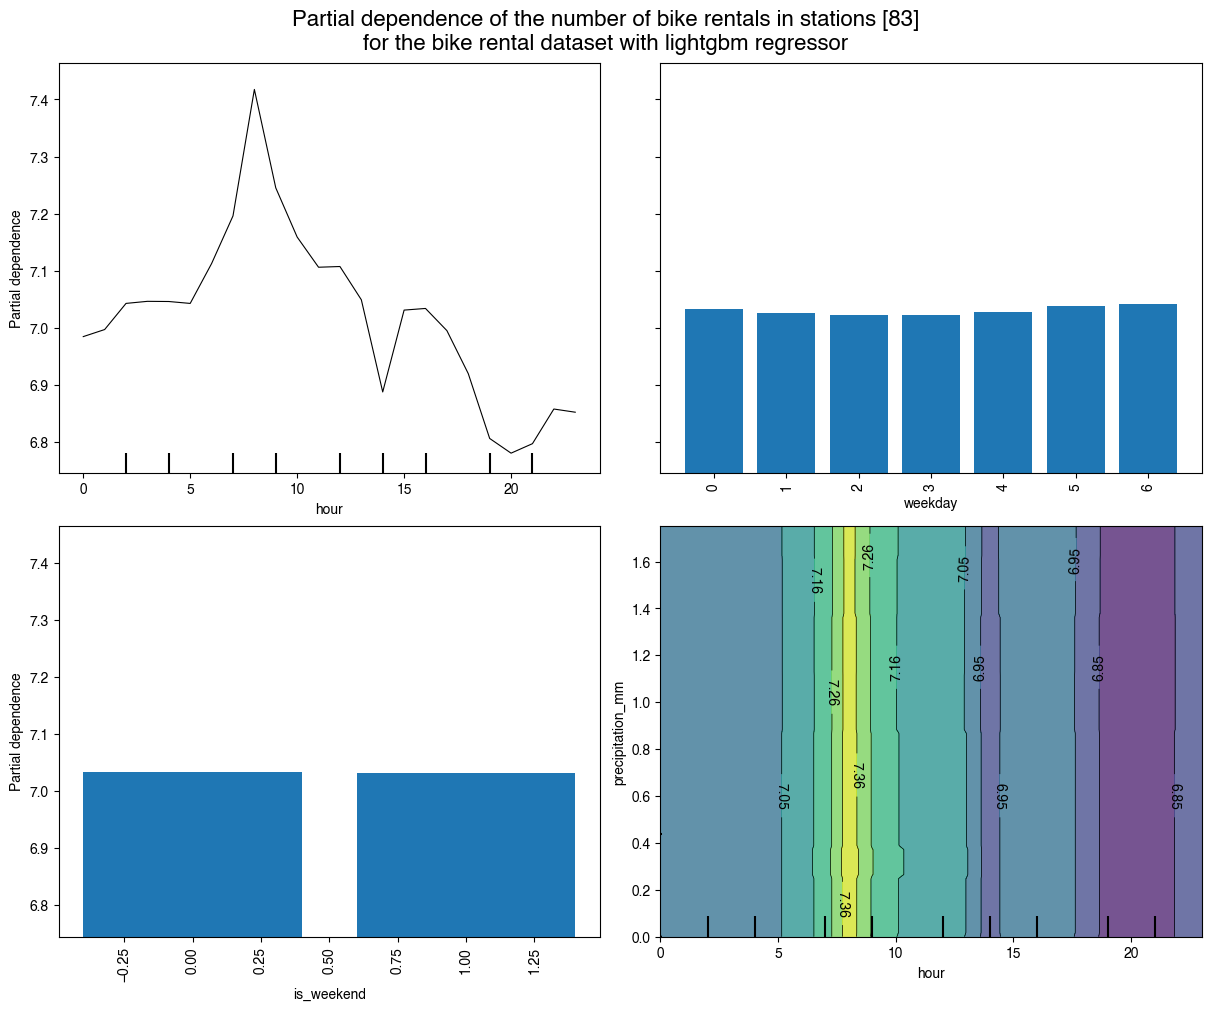

In [8]:
# pdp con variables bidimensionales (la opción esta en partial dependence))
plot_pdp_or_ice(
    df, 
    station_ids=[83],
    choice = "pdp", 
    ft = ['hour', 'weekday', 'is_weekend', ('hour', 'precipitation_mm')]) 
    

/Users/annagilmoliner/CD_2024_2025/EDM/smart-city/.venv/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 3 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


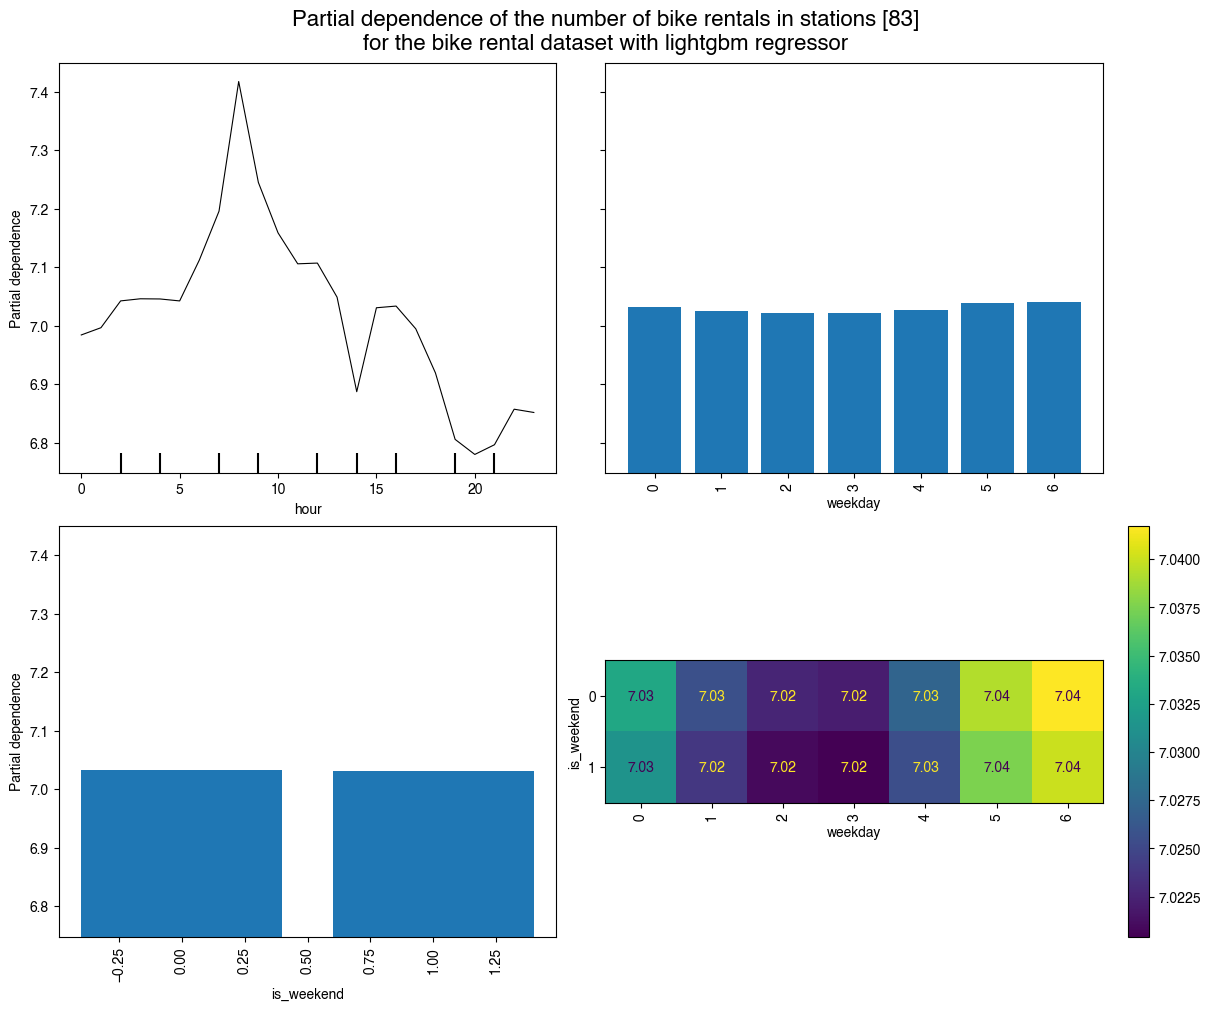

In [9]:
# pdp con variables bidimensionales (la opción esta en partial dependence))
plot_pdp_or_ice(
    df, 
    station_ids=[83],
    choice = "pdp", 
    ft = ['hour', 'weekday',"is_weekend",('is_weekend', 'weekday')])  
    # he puesto hora como variable categórica